# BibRec: Training Random Forest Model

### Train Random Forest Model on all ratings
RF Features: Country, State, Age, Year-of-Publication, Publisher


In [1]:
# Specify where to save the model
model_file = "rf6-ex5.pkl"

In [2]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='data/BX-Books.csv',
                                            users_path='data/BX-Users.csv',
                                            ratings_path='data/BX-Book-Ratings.csv')

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:94: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [3]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,40.263307,nyc,new_york,usa,0.0,0.0
1,2,18.000000,stockton,california,usa,0.0,0.0
2,3,28.232517,moscow,other,other,0.0,0.0
3,4,17.000000,porto,other,portugal,0.0,0.0
4,5,48.130016,farnborough,other,united_kingdom,0.0,0.0
...,...,...,...,...,...,...,...
278853,278854,35.032192,portland,oregon,usa,7.0,6.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.0,0.0
278855,278856,48.418803,brampton,ontario,canada,0.0,0.0
278856,278857,60.102430,knoxville,other,usa,0.0,0.0


In [4]:
books = books.drop(["isbn"], axis=1)
books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3
1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4
2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6
4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1
270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9


In [5]:
ratings = ratings.drop(["isbn"], axis=1)
ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780155061224,0.0,276726,5
1,9780521656153,-1.5,276729,3
2,9780521795029,1.5,276729,6
3,9780385501200,0.0,276744,7
4,9780385501200,0.0,11676,10
...,...,...,...,...
9444717,9780515107661,0.0,242006,10
9444718,9780515107661,0.0,249628,10
9444719,9780515107661,0.0,276709,10
9444720,9780590442442,0.0,197659,8


In [6]:
# limit data to top-rated books only
top_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
top_ratings = top_ratings[:10]
top_ratings = top_ratings.reset_index()
# user_id => nr of ratings
top_ratings = top_ratings.drop('user_id', axis=1)
top_ratings

,isbn13
0,9780316666343
1,9780971880108
2,9780385504201
3,9780312195519
4,9780060928339
5,9780590353427
6,9780142001745
7,978044667227
8,9780440237228
9,9780452282155


In [7]:
top_ratings = top_ratings.merge(ratings, on='isbn13', how='inner')
top_ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780316666343,1.000000,277439,7
1,9780316666343,1.000000,277752,7
2,9780316666343,1.000000,278633,9
3,9780316666343,1.000000,638,10
4,9780316666343,1.000000,709,3
...,...,...,...,...
1767199,9780452282155,1.896552,270801,9
1767200,9780452282155,1.896552,270820,9
1767201,9780452282155,1.896552,272445,10
1767202,9780452282155,1.896552,273086,9


In [8]:
encoded_books = hot_encode_books(books)
encoded_books

,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
0,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4,...,0,0,0,0,0,0,0,0,0,1
2,Decision in Normandy,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14,...,0,0,0,0,0,0,0,0,0,1
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6,...,0,0,0,0,0,0,0,0,0,1
4,The Mummies of Urumchi,E. J. W. Barber,1999,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17,...,0,0,0,0,0,0,0,0,0,1
270940,From One to One Hundred,Teri Sloat,1991,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14,...,0,0,0,0,0,0,0,0,0,1
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1,...,0,0,0,0,0,0,0,0,0,1
270942,Republic (World's Classics),Plato,1996,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9,...,0,0,0,0,0,0,0,0,0,1


In [9]:
encoded_users = hot_encode_users(users)
encoded_users

,user_id,age,city,user_mean,user_count,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,1,40.263307,nyc,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,stockton,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,28.232517,moscow,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,17.000000,porto,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,48.130016,farnborough,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,35.032192,portland,7.0,6.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
278854,278855,50.000000,tacoma,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
278855,278856,48.418803,brampton,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278856,278857,60.102430,knoxville,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
0,9780195153446,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9780002005012,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780060973124,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780374157067,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9780393045215,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270940,978052544763,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270941,9780060086671,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270942,9780192126047,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,1,40.263307,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,28.232517,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,17.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,48.130016,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,35.032192,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
278854,278855,50.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278855,278856,48.418803,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278856,278857,60.102430,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# TODO: normalized_rating doesn't make sense yet
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df_ratings = top_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,isbn13,user_id,book_rating
0,9780316666343,277439,7
1,9780316666343,277752,7
2,9780316666343,278633,9
3,9780316666343,638,10
4,9780316666343,709,3
...,...,...,...
1767199,9780452282155,270801,9
1767200,9780452282155,270820,9
1767201,9780452282155,272445,10
1767202,9780452282155,273086,9


In [13]:
df = df_ratings
df = df.merge(df_books, on="isbn13")
df = df.merge(df_users, on="user_id")
df

,isbn13,user_id,book_rating,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780316666343,277439,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9780316666343,277439,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,9780316666343,277439,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,9780316666343,277439,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,9780316666343,277439,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767199,9780452282155,274656,9,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1767200,9780452282155,274656,9,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1767201,9780452282155,274656,9,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1767202,9780452282155,274656,9,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
# Features
# X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
X = df.drop(['user_id', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [15]:
X

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767199,9780452282155,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1767200,9780452282155,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1767201,9780452282155,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1767202,9780452282155,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
Y

0          7
1          7
2          7
3          7
4          7
          ..
1767199    9
1767200    9
1767201    9
1767202    9
1767203    9
Name: book_rating, Length: 1767204, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [18]:
from os.path import exists
import pickle

if exists(model_file):
    print("Loading file:", model_file)
    with open(model_file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model:", model_file)
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)

Creating new model: rf6-ex5.pkl


In [19]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    4.4s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   11.6s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   16.7s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:   25.0s


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   35.4s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   45.8s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   58.8s


building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  1.3min


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  1.6min


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:  1.9min


building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:  2.2min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [20]:
import pickle

# Save the model to a file
with open(model_file, "wb") as file:
    pickle.dump(rfc, file)

In [21]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    3.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    3.9s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    4.8s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    5.9s finished


array([ 9,  8,  8, ..., 10, 10,  8])

In [22]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.87      0.91      0.89     13816
           2       0.82      0.79      0.80     15792
           3       0.88      0.85      0.87     18937
           4       0.84      0.87      0.86     14772
           5       0.91      0.84      0.87     36994
           6       0.84      0.85      0.84     33338
           7       0.86      0.85      0.86     71092
           8       0.90      0.88      0.89    112244
           9       0.85      0.87      0.86    106851
          10       0.86      0.89      0.88    106326

    accuracy                           0.87    530162
   macro avg       0.86      0.86      0.86    530162
weighted avg       0.87      0.87      0.87    530162

86.85213198984462


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    5.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    5.9s finished


Confusion matrix, without normalization
[[12630   370   349     0   188   187     0     0     0    92]
 [  731 12397   357   548   360   180   204   381   341   293]
 [  498   375 16168   176   166   167   863   187   337     0]
 [  183   180   177 12881     0   573   261   339   178     0]
 [  551   370   529   384 30976     0   409   486  1552  1737]
 [    0   539   360   547   393 28272   553   596  1135   943]
 [    0   361   261    87   392   882 60746  2002  3719  2642]
 [    0   356   155   539   365   718  2574 98464  4494  4579]
 [    0     0     0    90   542  1089  3181  4116 93236  4597]
 [    0   258     0     0   500  1527  1464  2804  5086 94687]]


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    3.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    3.8s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    4.6s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    6.0s finished


Normalized confusion matrix
[[9.14e-01 2.68e-02 2.53e-02 0.00e+00 1.36e-02 1.35e-02 0.00e+00 0.00e+00
  0.00e+00 6.66e-03]
 [4.63e-02 7.85e-01 2.26e-02 3.47e-02 2.28e-02 1.14e-02 1.29e-02 2.41e-02
  2.16e-02 1.86e-02]
 [2.63e-02 1.98e-02 8.54e-01 9.29e-03 8.77e-03 8.82e-03 4.56e-02 9.87e-03
  1.78e-02 0.00e+00]
 [1.24e-02 1.22e-02 1.20e-02 8.72e-01 0.00e+00 3.88e-02 1.77e-02 2.29e-02
  1.20e-02 0.00e+00]
 [1.49e-02 1.00e-02 1.43e-02 1.04e-02 8.37e-01 0.00e+00 1.11e-02 1.31e-02
  4.20e-02 4.70e-02]
 [0.00e+00 1.62e-02 1.08e-02 1.64e-02 1.18e-02 8.48e-01 1.66e-02 1.79e-02
  3.40e-02 2.83e-02]
 [0.00e+00 5.08e-03 3.67e-03 1.22e-03 5.51e-03 1.24e-02 8.54e-01 2.82e-02
  5.23e-02 3.72e-02]
 [0.00e+00 3.17e-03 1.38e-03 4.80e-03 3.25e-03 6.40e-03 2.29e-02 8.77e-01
  4.00e-02 4.08e-02]
 [0.00e+00 0.00e+00 0.00e+00 8.42e-04 5.07e-03 1.02e-02 2.98e-02 3.85e-02
  8.73e-01 4.30e-02]
 [0.00e+00 2.43e-03 0.00e+00 0.00e+00 4.70e-03 1.44e-02 1.38e-02 2.64e-02
  4.78e-02 8.91e-01]]


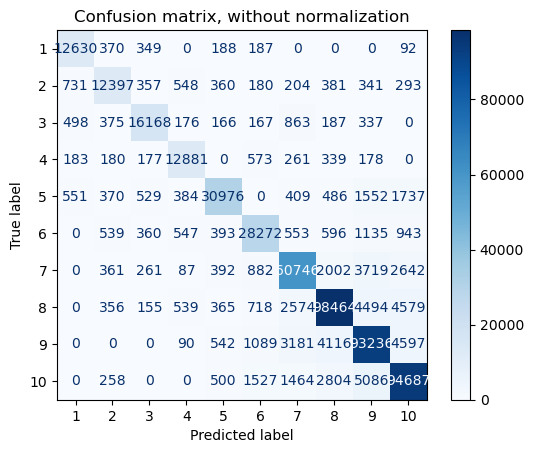

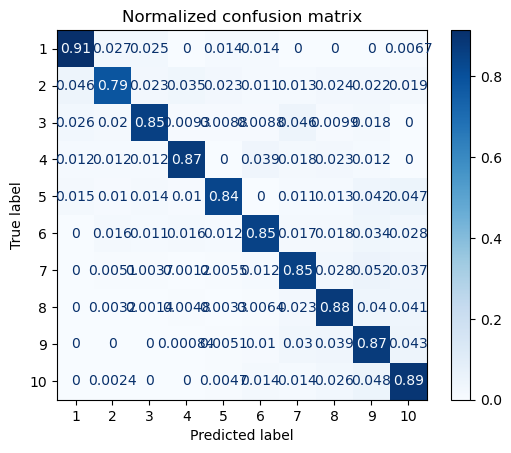

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [24]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.7s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    6.9s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    8.4s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   10.5s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   12.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   13.1s finished


0.873381016974363

In [25]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.743972
0,isbn13,0.056201
1,normalized_year_of_publication,0.054988
65,state_other,0.011448
45,state_california,0.006362
...,...,...
21,publisher_zebra_books,0.000000
3,publisher_silhouette,0.000000
2,publisher_harlequin,0.000000
5,publisher_ballantine_books,0.000000


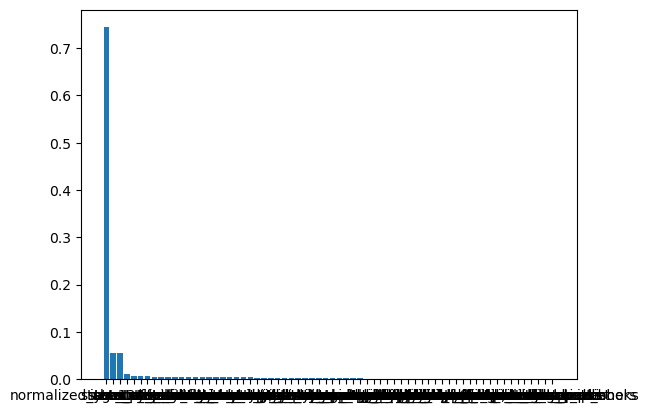

In [26]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [27]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
44,country_other,0.006323
24,country_usa,0.006253
25,country_canada,0.004197
29,country_australia,0.003194
26,country_united_kingdom,0.003008
27,country_germany,0.002968
32,country_portugal,0.002729
34,country_netherlands,0.002716
28,country_spain,0.002447
41,country_malaysia,0.002072


In [28]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
65,state_other,0.011448
45,state_california,0.006362
52,state_pennsylvania,0.005179
53,state_illinois,0.005055
57,state_michigan,0.004966
60,state_massachusetts,0.004948
50,state_new_york,0.004844
51,state_florida,0.004821
56,state_ohio,0.004799
63,state_north_carolina,0.004535


In [29]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
22,publisher_other,0.002765
11,publisher_warner_books,0.001687
9,publisher_penguin_books,0.001650
15,publisher_signet_book,0.000000
6,publisher_bantam_books,0.000000
7,publisher_scholastic,0.000000
8,publisher_simon_&amp;_schuster,0.000000
10,publisher_berkley_publishing_group,0.000000
12,publisher_penguin_usa,0.000000
13,publisher_harpercollins,0.000000


In [30]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.743972
Name: Importances, dtype: float64
country_importance: 0.04704423473162814
state_importance: 0.09169220629592044
publisher_importance: 0.006102414246493073
